In [24]:
# importing load_dotenv
from dotenv import load_dotenv
# importing operating system
import os
# makes file acessable
load_dotenv()
# importing requests
import requests
# importing pandas
import pandas as pd
# importing alpaca trade api
import alpaca_trade_api as trade_api
# importing datetime
from datetime import datetime
# importing seaborn
import seaborn as sns

In [5]:
# Retrieve API key and store as Python variable
alpaca_api_key = os.getenv('ALPACA_API_KEY')
alpaca_secret_key = os.getenv('ALPACA_SECRET_KEY')

In [8]:
# Using the Alpaca API, query the database and get 1 year's worth of daily stock information for the following stocks:
tickers = ['SPY','LUV','DIS','AAPL','SBUX','WORK']

In [9]:
# defining the alpaca trade api
from alpaca_trade_api.rest import REST, TimeFrame
stocks = REST(alpaca_api_key,alpaca_secret_key)

In [26]:
stock_price = stocks.get_bars(tickers, TimeFrame.Day, "2020-03-01", "2021-03-01", adjustment='raw').df

In [27]:
stock_price.index=stock_price.index.date

In [28]:
stock_price.index=pd.to_datetime(stock_price.index)

In [29]:
stock_price=stock_price[['close', 'symbol']]

In [30]:
stocks_sorted = pd.pivot_table(stock_price, values='close', index=stock_price.index, columns=['symbol'])

In [31]:
table_daily_returns = stocks_sorted.pct_change()

In [32]:
table_daily_returns.dropna(inplace=True)

In [33]:
table_daily_returns

symbol,AAPL,DIS,LUV,SBUX,SPY,WORK
2020-03-03,-0.031759,-0.029422,-0.037061,-0.045885,-0.028632,-0.010658
2020-03-04,0.046385,0.023444,0.038045,0.013613,0.042033,0.032689
2020-03-05,-0.032437,-0.043631,-0.035798,-0.043680,-0.033242,0.021223
2020-03-06,-0.013280,0.011318,0.010608,-0.011156,-0.016531,-0.069391
2020-03-09,-0.079092,-0.094734,-0.046140,-0.059862,-0.078095,-0.057911
...,...,...,...,...,...,...
2021-02-23,-0.001111,0.027795,0.035225,-0.004322,0.001214,-0.010266
2021-02-24,-0.004052,0.002131,0.045310,0.029693,0.011019,-0.001650
2021-02-25,-0.034783,-0.033062,-0.016529,-0.008718,-0.024096,-0.012987
2021-02-26,0.002232,-0.010158,-0.003087,0.044071,-0.005153,-0.020813


<AxesSubplot:ylabel='Frequency'>

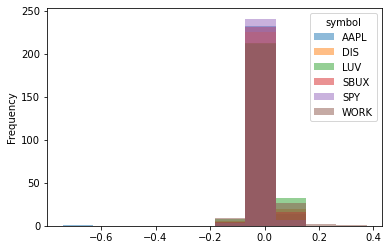

In [34]:
# Visualize the distribution of daily returns across all stocks using a histogram plot.
table_daily_returns.plot.hist(alpha=0.5)

<AxesSubplot:ylabel='Density'>

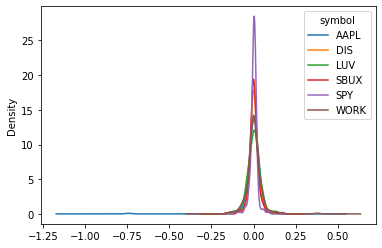

In [35]:
# Visualize the distribution of daily returns across all stocks using a density plot
table_daily_returns.plot.density()

/opt/anaconda3/envs/alpacaenv/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

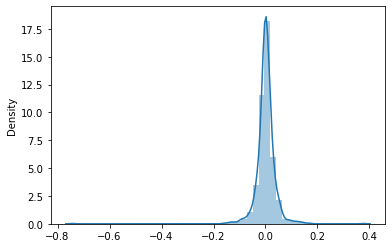

In [36]:
sns.distplot(table_daily_returns)